In [1]:
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


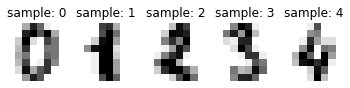

In [7]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):   # 5개의 샘플만 출력
  plt.subplot(2, 5, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
  plt.title('sample: %i' % label)

In [8]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [9]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [10]:
X = digits.data
Y = digits.target

#**다층 퍼셉트론 분류기 만들기**

In [11]:
import torch
import torch.nn as nn
from torch import optim

In [12]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [13]:
X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

In [14]:
loss_fn = nn.CrossEntropyLoss()

In [15]:
optimizer = optim.Adam(model.parameters())

In [16]:
losses = []

In [18]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, 100, loss.item()
    ))

  losses.append(loss.item())

Epoch    0/100 Cost: 2.319499
Epoch   10/100 Cost: 2.050209
Epoch   20/100 Cost: 1.830871
Epoch   30/100 Cost: 1.568765
Epoch   40/100 Cost: 1.265982
Epoch   50/100 Cost: 0.941710
Epoch   60/100 Cost: 0.661149
Epoch   70/100 Cost: 0.474574
Epoch   80/100 Cost: 0.354356
Epoch   90/100 Cost: 0.276550


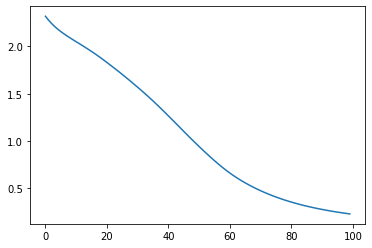

In [19]:
plt.plot(losses)